In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

In [5]:

X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [8]:
er = Sequential()

In [9]:
er.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
er.add(Dropout(0.2))

In [10]:
er.add(LSTM(units = 50, return_sequences = True))
er.add(Dropout(0.2))

In [11]:
er.add(LSTM(units = 50, return_sequences = True))
er.add(Dropout(0.3))

In [12]:
er.add(LSTM(units = 50))
er.add(Dropout(0.4))

In [13]:
er.add(Dense(units = 1))

In [14]:
er.compile(optimizer = 'adam', loss = 'mean_squared_error')
er.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 15s 147ms/step - loss: 0.1905
Epoch 2/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0580
Epoch 3/100
38/38 [==============================] - 6s 146ms/step - loss: 0.0452
Epoch 4/100
38/38 [==============================] - 6s 149ms/step - loss: 0.0431
Epoch 5/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0410
Epoch 6/100
38/38 [==============================] - 6s 150ms/step - loss: 0.0406
Epoch 7/100
38/38 [==============================] - 6s 147ms/step - loss: 0.0393
Epoch 8/100
38/38 [==============================] - 6s 146ms/step - loss: 0.0373
Epoch 9/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0400
Epoch 10/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0377
Epoch 11/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0320
Epoch 12/100
38/38 [==============================] - 6s 162ms/step - loss: 0.0329
Epoch 13/100

In [15]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [16]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = er.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

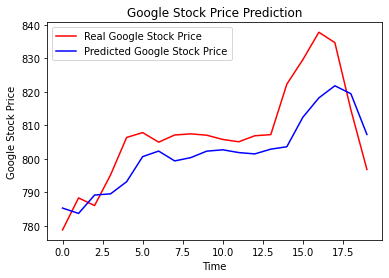

In [17]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
